In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans               
from sklearn.preprocessing import MinMaxScaler   
from sklearn.impute import SimpleImputer    
from sklearn.discriminant_analysis import StandardScaler    
import warnings
warnings.filterwarnings('ignore') 
from scipy.spatial import distance
from scipy.stats import norm
from scipy import cluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import pickle

In [61]:
# Create a copy of the original data
original_data_copy = PROJECT5.ipynb.copy()
original_data_copy

NameError: name 'PROJECT5' is not defined

# Task 1 (User Overview Analysis)

In [2]:
df= pd.read_csv('telcom_data.csv')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [8]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11634072.5,11009410.13,11626851.72,11001754.82,422044702.6,8.288398e+06,421100544.2,8.264799e+06,NaN,NaN


In [10]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [11]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

DROPPING UNNECESSARILY COLUM'S

In [12]:
# drop columns with more than 30% missing values
columns_to_drop = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)','Last Location Name']
columns_to_drop = [col.strip() for col in columns_to_drop]

df_clean = df.drop(columns=columns_to_drop)
print("Number of rows after dropping columns: ", len(df_clean))

Number of rows after dropping columns:  150001


In [13]:
df_clean.shape

(150001, 49)

FILLING ALL THE MISSING VALUE'S 

In [14]:
# FILLING THE MISSING VALUES 
columns_to_fill = ['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                   '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
                   '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']

# Replace NaN values with a specific value
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(0)


In [15]:
df_clean

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,23.0,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,16.0,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,6.0,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,44.0,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,6.0,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,52.0,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,23.0,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,43.0,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,34.0,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


TASK 1.1 
AGGREGATE PER USER THE  FOLLOWING INFORMATION IN THE COLUM 

1.Number of xDR Sessions
2.Session Duration
3.The total download (DL) and upload (UL) data
4.The total data volume (in Bytes) during this session for each application


In [5]:
Data={"Xdr_Session":df["Bearer Id"],
  "Dur_msec":df["Dur. (ms)"],
  "MSISDN/Number":df["MSISDN/Number"],
  "Activity Duration DL (ms)":df["Activity Duration DL (ms)"],
  "Activity Duration UL (ms)":df["Activity Duration UL (ms)"],
  "Social Media DL (Bytes)":df["Social Media DL (Bytes)"],
  "Social Media UL (Bytes)":df["Social Media UL (Bytes)"],
  "Google DL (Bytes)":df["Google DL (Bytes)"],
  "Google UL (Bytes)":df["Google UL (Bytes)"],
  "Email DL (Bytes)":df["Email DL (Bytes)"],
  "Email UL (Bytes)":df["Email UL (Bytes)"],
  "Youtube DL (Bytes)":df["Youtube DL (Bytes)"],
  "Youtube UL (Bytes)":df["Youtube UL (Bytes)"],
  "Netflix DL (Bytes)":df["Netflix DL (Bytes)"],
  "Netflix UL (Bytes)":df["Netflix UL (Bytes)"],
  "Gaming DL (Bytes)":df["Gaming DL (Bytes)"],
  "Gaming UL (Bytes)":df["Gaming UL (Bytes)"],
  "Other DL (Bytes)":df["Other DL (Bytes)"],
  "Other UL (Bytes)":df["Other UL (Bytes)"],
  "Total UL (Bytes)":df["Total UL (Bytes)"],
  "Total DL (Bytes)":df["Total DL (Bytes)"]}

In [6]:
data1=pd.DataFrame(Data)


In [7]:
data1

,Xdr_Session,Dur_msec,MSISDN/Number,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1823652.0,3.366496e+10,37624.0,38787.0,1545765.000,24420.00000,1634479.000,1271433.000,3563542.000,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,1365104.0,3.368185e+10,168.0,3560.0,1926113.000,7165.00000,3493924.000,920172.000,629046.000,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,1361762.0,3.376063e+10,0.0,0.0,1684053.000,42224.00000,8535055.000,1694064.000,2690151.000,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,1321509.0,3.375034e+10,3330.0,37882.0,644121.000,13372.00000,9023734.000,2788027.000,1439754.000,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,1089009.0,3.369980e+10,0.0,0.0,862600.000,50188.00000,6248284.000,1500559.000,1936496.000,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,81230.0,3.365069e+10,42376.0,41915.0,3464974.000,52091.00000,9967603.000,2817311.000,57639.000,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,97970.0,3.366345e+10,17264.0,16759.0,2344568.000,7613.00000,2229420.000,2185941.000,1954414.000,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,98249.0,3.362189e+10,25003.0,28640.0,1245845.000,14394.00000,3850890.000,2734579.000,1525734.000,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,97910.0,3.361962e+10,13405.0,34088.0,801547.000,21562.00000,4189773.000,3567494.000,2228270.000,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [8]:
data1.columns

Index(['Xdr_Session', 'Dur_msec', 'MSISDN/Number', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

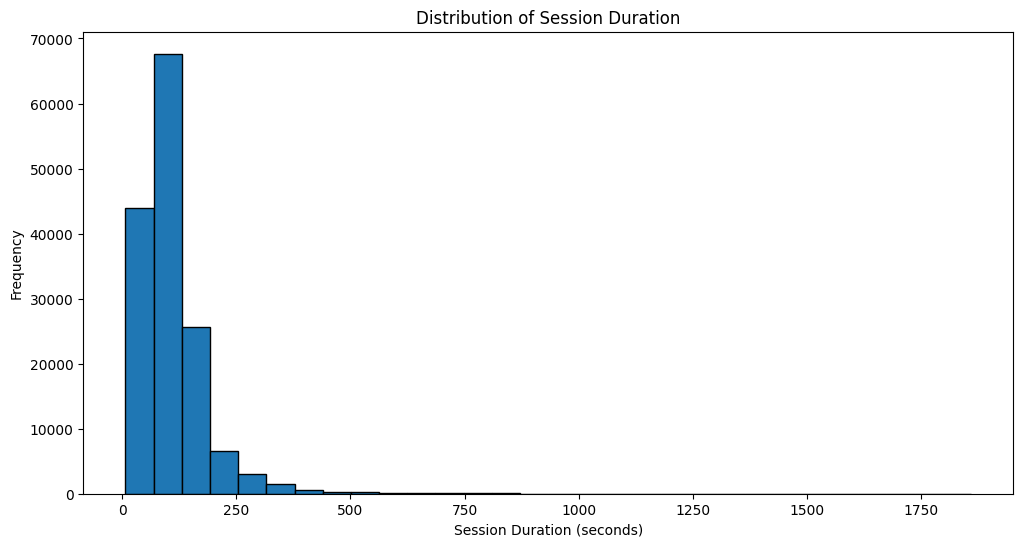

In [9]:
# Plotting session duration
plt.figure(figsize=(12, 6))
plt.hist(data1['Dur_msec'] / 1000, bins=30, edgecolor='black')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Duration')
plt.show()


In [10]:
# Calculate the total data volume for each application
total_data = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
                 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

In [11]:
total_data

Social Media DL (Bytes)    2.693001e+11
Social Media UL (Bytes)    4.939298e+09
Google DL (Bytes)          8.626186e+11
Google UL (Bytes)          3.084833e+11
Email DL (Bytes)           2.687611e+11
Email UL (Bytes)           7.010648e+10
Youtube DL (Bytes)         1.745123e+12
Youtube UL (Bytes)         1.651423e+12
Netflix DL (Bytes)         1.744039e+12
Netflix UL (Bytes)         1.650274e+12
Gaming DL (Bytes)          6.330713e+13
Gaming UL (Bytes)          1.243268e+12
Other DL (Bytes)           6.316550e+13
Other UL (Bytes)           1.239728e+12
dtype: float64

# TASK 1.2 - EXPLORATORY DATA ANALYSIS 

In [12]:
data1.describe()  #ANALYSE THE BASIC METRICS OF DATAFRAME

,Xdr_Session,Dur_msec,MSISDN/Number,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,1.500000e+05,1.489350e+05,1.500000e+05,1.500000e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,1.046086e+05,4.188282e+10,1.829177e+06,1.408880e+06,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,8.103762e+04,2.447443e+12,5.696395e+06,4.643231e+06,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,7.142000e+03,3.360100e+10,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,5.744050e+04,3.365130e+10,1.487775e+04,2.153975e+04,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349880e+18,8.639900e+04,3.366371e+10,3.930450e+04,4.679350e+04,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304240e+19,1.324302e+05,3.368349e+10,6.796095e+05,5.990952e+05,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318650e+19,1.859336e+06,8.823970e+14,1.365365e+08,1.449113e+08,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [13]:
data1.shape

(150001, 21)

In [14]:
data1.info()  # DESCRIBING ALL COLUM'S IN DATA FRAME 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Xdr_Session                149010 non-null  float64
 1   Dur_msec                   150000 non-null  float64
 2   MSISDN/Number              148935 non-null  float64
 3   Activity Duration DL (ms)  150000 non-null  float64
 4   Activity Duration UL (ms)  150000 non-null  float64
 5   Social Media DL (Bytes)    150001 non-null  float64
 6   Social Media UL (Bytes)    150001 non-null  float64
 7   Google DL (Bytes)          150001 non-null  float64
 8   Google UL (Bytes)          150001 non-null  float64
 9   Email DL (Bytes)           150001 non-null  float64
 10  Email UL (Bytes)           150001 non-null  float64
 11  Youtube DL (Bytes)         150001 non-null  float64
 12  Youtube UL (Bytes)         150001 non-null  float64
 13  Netflix DL (Bytes)         15

Createing a new dataset which include only Quantitative Variable 

In [15]:
quantitative_columns = data1.select_dtypes(include=['int64', 'float64'])
print("Quantitative Columns:")
print(quantitative_columns)


Quantitative Columns:
         Xdr_Session   Dur_msec  MSISDN/Number  Activity Duration DL (ms)  \
0       1.311450e+19  1823652.0   3.366496e+10                    37624.0   
1       1.311450e+19  1365104.0   3.368185e+10                      168.0   
2       1.311450e+19  1361762.0   3.376063e+10                        0.0   
3       1.311450e+19  1321509.0   3.375034e+10                     3330.0   
4       1.311450e+19  1089009.0   3.369980e+10                        0.0   
...              ...        ...            ...                        ...   
149996  7.277830e+18    81230.0   3.365069e+10                    42376.0   
149997  7.349880e+18    97970.0   3.366345e+10                    17264.0   
149998  1.311450e+19    98249.0   3.362189e+10                    25003.0   
149999  1.311450e+19    97910.0   3.361962e+10                    13405.0   
150000           NaN        NaN            NaN                        NaN   

        Activity Duration UL (ms)  Social Media DL (B

Computing Dispersion Parameters For Each Quantitative Variable

In [16]:
Dispersion_Parameter = np.max(quantitative_columns) - np.min(quantitative_columns)
q1 = np.percentile(quantitative_columns, 25)
q3 = np.percentile(quantitative_columns, 75)
iqr = q3 - q1
variance = np.var(quantitative_columns)
std_dev = np.std(quantitative_columns)

In [17]:
print("Range:",Dispersion_Parameter )
print("IQR:", iqr)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Range: 1.31865e+19
IQR: nan
Variance: Xdr_Session                  8.370374e+36
Dur_msec                     6.567052e+09
MSISDN/Number                5.989937e+24
Activity Duration DL (ms)    3.244870e+13
Activity Duration UL (ms)    2.155945e+13
Social Media DL (Bytes)      1.072216e+12
Social Media UL (Bytes)      3.612324e+08
Google DL (Bytes)            1.095005e+13
Google UL (Bytes)            1.415893e+12
Email DL (Bytes)             1.072956e+12
Email UL (Bytes)             7.288294e+10
Youtube DL (Bytes)           4.503143e+13
Youtube UL (Bytes)           4.026413e+13
Netflix DL (Bytes)           4.522826e+13
Netflix UL (Bytes)           4.044284e+13
Gaming DL (Bytes)            5.951974e+16
Gaming UL (Bytes)            2.287406e+13
Other DL (Bytes)             5.914828e+16
Other UL (Bytes)             2.274324e+13
Total UL (Bytes)             1.271560e+14
Total DL (Bytes)             5.960535e+16
dtype: float64
Standard Deviation: Xdr_Session                  2.893160e+18
Dur

In [18]:
df['Handset Type'].unique()          # Finding Unique Value's in Handset Type 

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

# Identifying The Top 10 Handsets Used By Customer's 

In [19]:
Top10Handsets =  df['Handset Type'].value_counts().head(10)
Top10Handsets

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Identifying The Top 3 Handset's Manufactures

In [20]:
Top3Manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(Top3Manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


Identifying The Top 5 Handset's Per Top 3 Handset's Manufacturer

In [21]:
Top5Handset = df['Handset Type'].value_counts().head(5)
Top5Handset

Handset Type
Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
undefined                   8987
Apple iPhone 7 (A1778)      6326
Name: count, dtype: int64

BIVARIATE ANALYZE

In [33]:
#Analysis of the relationship between two variables using bivariate analysis.
#Analyse the Total of Download's And Upload Of Each Application 

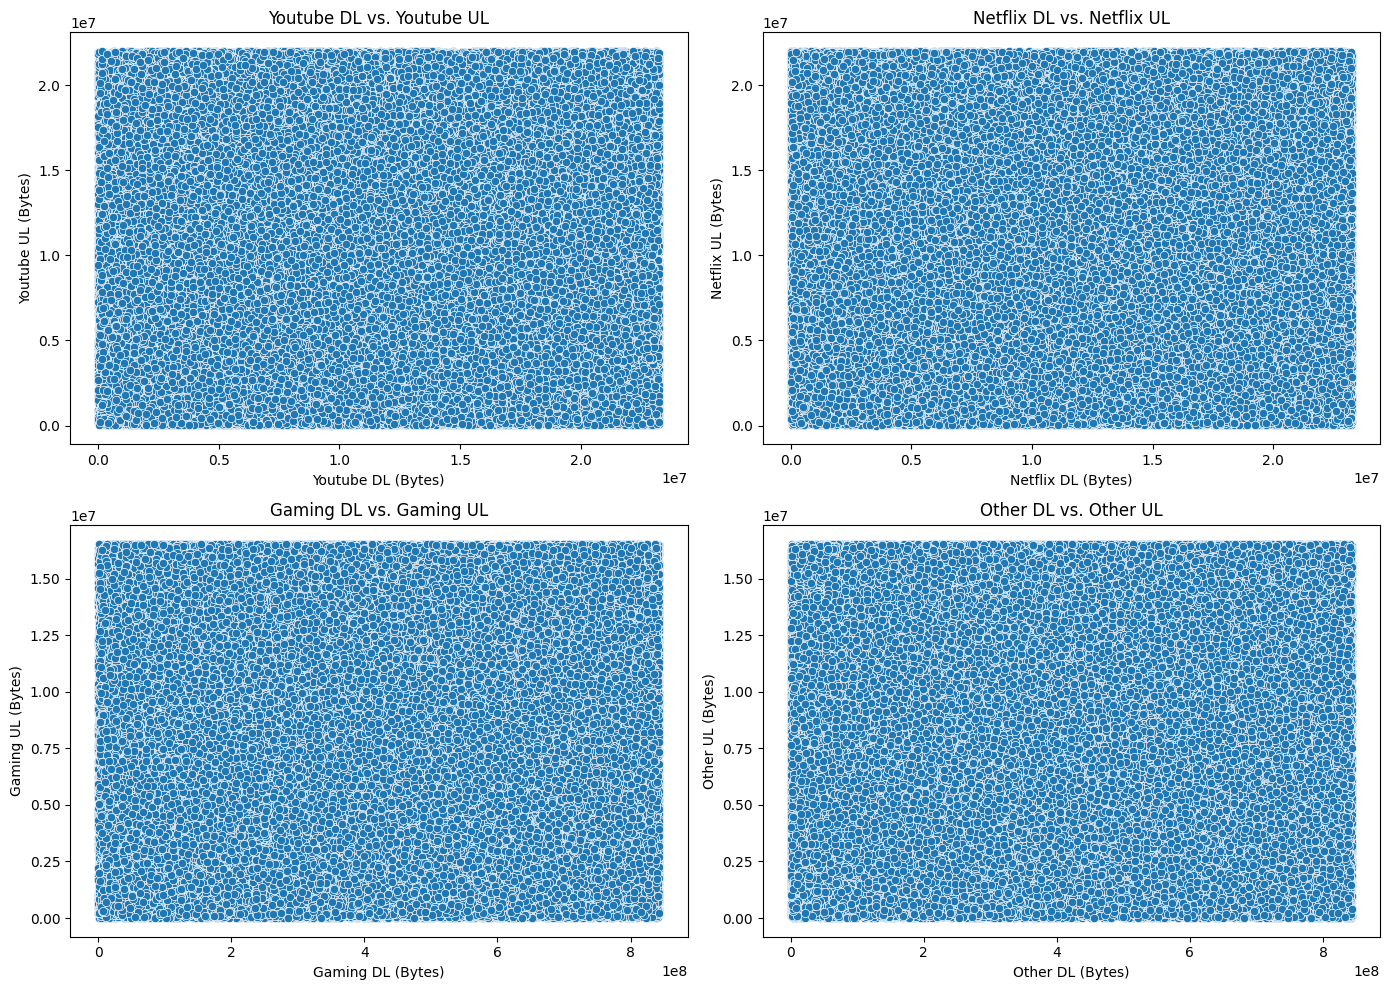

In [22]:
# Scatter Plots
applications = ['Youtube', 'Netflix', 'Gaming', 'Other']
plt.figure(figsize=(14, 10))

for i, app in enumerate(applications, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=f'{app} DL (Bytes)', y=f'{app} UL (Bytes)', data=df)
    plt.title(f'{app} DL vs. {app} UL')

plt.tight_layout()
plt.show()

CORRELATION  MATRIX

In [23]:
# List of applications
applications = ['Youtube', 'Netflix', 'Gaming', 'Other']

# Loop through applications and calculate correlation matrices
for app in applications:
    # Select columns related to the current application
    app_columns = [f'{app} DL (Bytes)', f'{app} UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
    
    # Calculate the correlation matrix for the current application
    correlation_matrix = df[app_columns].corr()
    
    # Display the correlation matrix
    print(f'Correlation Matrix for {app}:')
    print(correlation_matrix)
    print()

Correlation Matrix for Youtube:
                    Youtube DL (Bytes)  Youtube UL (Bytes)  Total UL (Bytes)  \
Youtube DL (Bytes)            1.000000            0.002433         -0.000384   
Youtube UL (Bytes)            0.002433            1.000000          0.563917   
Total UL (Bytes)             -0.000384            0.563917          1.000000   
Total DL (Bytes)              0.025685           -0.002301         -0.001895   

                    Total DL (Bytes)  
Youtube DL (Bytes)          0.025685  
Youtube UL (Bytes)         -0.002301  
Total UL (Bytes)           -0.001895  
Total DL (Bytes)            1.000000  

Correlation Matrix for Netflix:
                    Netflix DL (Bytes)  Netflix UL (Bytes)  Total UL (Bytes)  \
Netflix DL (Bytes)            1.000000            0.001065         -0.000662   
Netflix UL (Bytes)            0.001065            1.000000          0.561779   
Total UL (Bytes)             -0.000662            0.561779          1.000000   
Total DL (Bytes)   

CORRELATION HEATMAP

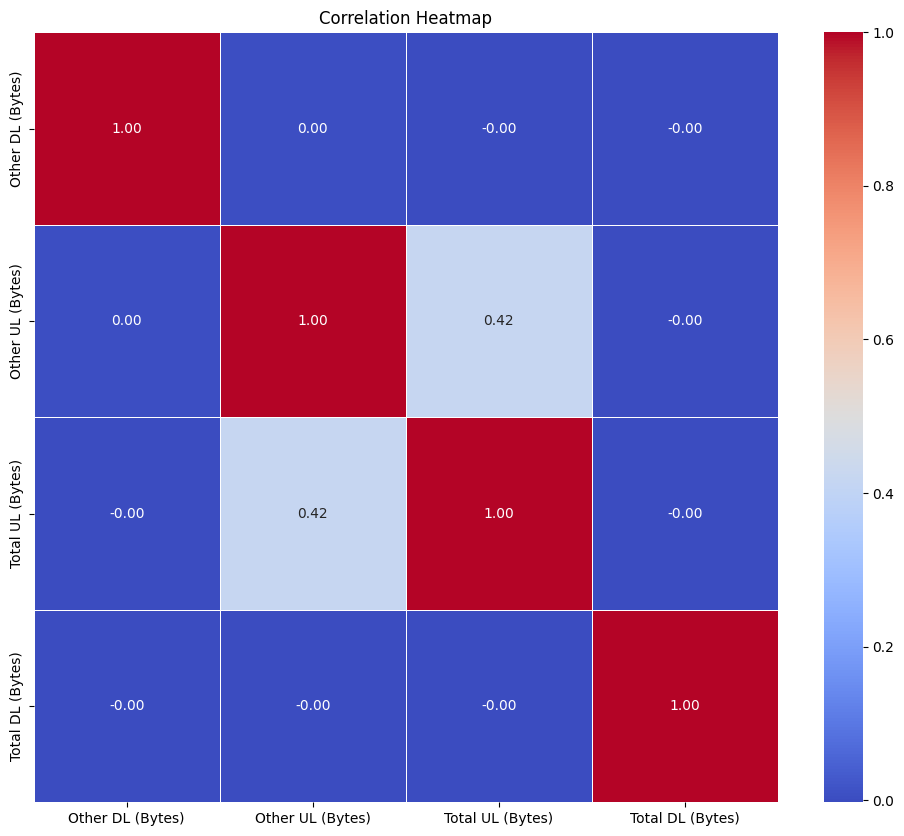

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Compute Top 5 Decile classes Based on Total Duration For All Session's 

In [25]:
df['Total Data (DL+UL)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']     #Compute Total Data (DL+UL)

df['Duration Decile'] = pd.qcut(df['Dur. (ms)'], q=10, labels=False, duplicates='drop')    #Compute Deciles based on Total Duration

top_five_deciles = df[df['Duration Decile'] >= 5]    #Segment users into the top five decile classes

total_data_per_decile = top_five_deciles.groupby('Duration Decile')['Total Data (DL+UL)'].sum()    #Compute Total Data per Decile Class

print(total_data_per_decile)


Duration Decile
5.0    7.438004e+12
6.0    7.416929e+12
7.0    7.458742e+12
8.0    7.459600e+12
Name: Total Data (DL+UL), dtype: float64


Task 2 - User Engagement Analysis


1.Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric 


In [26]:
# Calculate engagement metrics: total data usage and session duration

data1['Total Data Usage'] = data1['Total UL (Bytes)'] + data1['Total DL (Bytes)']
data1['Session Duration'] = data1['Dur_msec']

# Group the data by customer ID (MSISDN) and calculate sum of engagement metrics
grouped_data = data1.groupby('MSISDN/Number').agg({
    'Total Data Usage': 'sum',
    'Session Duration': 'sum'
})

# Sort the customers based on the engagement metric in descending order
sorted_data = grouped_data.sort_values(by='Total Data Usage', ascending=False)

# top 10 customers
top_10_customers = sorted_data.head(10)

print(top_10_customers)      

               Total Data Usage  Session Duration
MSISDN/Number                                    
3.361489e+10       8.846226e+09         9966898.0
3.376054e+10       8.514774e+09         9279434.0
3.362578e+10       8.499621e+09        18553754.0
3.362632e+10       7.971167e+09         8791927.0
3.367588e+10       7.891111e+09         4865947.0
3.365973e+10       7.705863e+09         4035428.0
3.366646e+10       7.308501e+09         4536757.0
3.376041e+10       7.132371e+09         5321667.0
3.366471e+10       6.872018e+09         2927785.0
3.369879e+10       6.540899e+09         5169128.0


Normalize each engagement metric and run a k-means Cluster's (k=3)  


In [27]:
engagement_metrics = data1[['Xdr_Session', 'Dur_msec']]

# Filling missing values with the median value
imputer = SimpleImputer(strategy='median')
engagement_metrics = imputer.fit_transform(engagement_metrics)

# Normalize the engagement metrics using Min-Max scaling
minmax_scaler = MinMaxScaler()
normalized_engagement_metrics = minmax_scaler.fit_transform(engagement_metrics)

# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data1['Cluster'] = kmeans.fit_predict(normalized_engagement_metrics)

print(data1[['MSISDN/Number','Cluster']])

        MSISDN/Number  Cluster
0        3.366496e+10        1
1        3.368185e+10        1
2        3.376063e+10        1
3        3.375034e+10        1
4        3.369980e+10        1
...               ...      ...
149996   3.365069e+10        2
149997   3.366345e+10        2
149998   3.362189e+10        1
149999   3.361962e+10        1
150000            NaN        2

[150001 rows x 2 columns]


After applying the K-means clustering algorithm to the engagement metrics data,
we have successfully classified the customers into three groups of engagement.
The clustering analysis provides insights into customer behavior based on their engagement patterns.




Cluster 1:
* Representative Characteristics: Average engagement patterns.
* Interpretation: Baseline group, consider further analysis for targeted strategies.

Cluster 2:

* Representative Characteristics: Higher data usage and longer session durations.
* Interpretation: Potential heavy data users; consider personalized offerings.

Cluster 3:

* Representative Characteristics: Lower data usage and shorter sessions.
* Interpretation: More casual or infrequent users; consider targeted campaigns for increased usage.

NaN Values:

* Interpretation: Missing values in 'MSISDN/Number' column.
* Actionable Insights: Investigate and handle missing values appropriately for a comprehensive analysis.

In [28]:
data1

,Xdr_Session,Dur_msec,MSISDN/Number,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data Usage,Session Duration,Cluster
0,1.311450e+19,1823652.0,3.366496e+10,37624.0,38787.0,1545765.000,24420.00000,1634479.000,1271433.000,3563542.000,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,345629377.0,1823652.0,1
1,1.311450e+19,1365104.0,3.368185e+10,168.0,3560.0,1926113.000,7165.00000,3493924.000,920172.000,629046.000,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,707185356.0,1365104.0,1
2,1.311450e+19,1361762.0,3.376063e+10,0.0,0.0,1684053.000,42224.00000,8535055.000,1694064.000,2690151.000,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,307690973.0,1361762.0,1
3,1.311450e+19,1321509.0,3.375034e+10,3330.0,37882.0,644121.000,13372.00000,9023734.000,2788027.000,1439754.000,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,889352748.0,1321509.0,1
4,1.311450e+19,1089009.0,3.369980e+10,0.0,0.0,862600.000,50188.00000,6248284.000,1500559.000,1936496.000,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,607681403.0,1089009.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,81230.0,3.365069e+10,42376.0,41915.0,3464974.000,52091.00000,9967603.000,2817311.000,57639.000,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,631804110.0,81230.0,2
149997,7.349880e+18,97970.0,3.366345e+10,17264.0,16759.0,2344568.000,7613.00000,2229420.000,2185941.000,1954414.000,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,705783925.0,97970.0,2
149998,1.311450e+19,98249.0,3.362189e+10,25003.0,28640.0,1245845.000,14394.00000,3850890.000,2734579.000,1525734.000,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,627698629.0,98249.0,1
149999,1.311450e+19,97910.0,3.361962e+10,13405.0,34088.0,801547.000,21562.00000,4189773.000,3567494.000,2228270.000,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,401522016.0,97910.0,1


Computing the minimum, maximum, average & total non-normalized metrics for each cluster.

In [29]:
# Assuming 'Cluster' is already a column in your DataFrame
metrics_summary = data1.groupby('Cluster')[['Xdr_Session', 'Dur_msec']].agg(['min', 'max', 'mean', 'sum']).reset_index()
metrics_summary

Cluster   Xdr_Session                                            Dur_msec  \
                    min           max          mean           sum       min   
0       0  6.917540e+18  7.566060e+18  7.340384e+18  1.483125e+23  127668.0   
1       1  1.268210e+19  1.318650e+19  1.307210e+19  9.600673e+23    7142.0   
2       2  6.917540e+18  7.421940e+18  7.268899e+18  4.024135e+23    7146.0   

                                           
         max           mean           sum  
0  1573420.0  199559.759923  4.047271e+09  
1  1859336.0  104937.296430  7.707015e+09  
2   149118.0   69959.978001  3.936998e+09

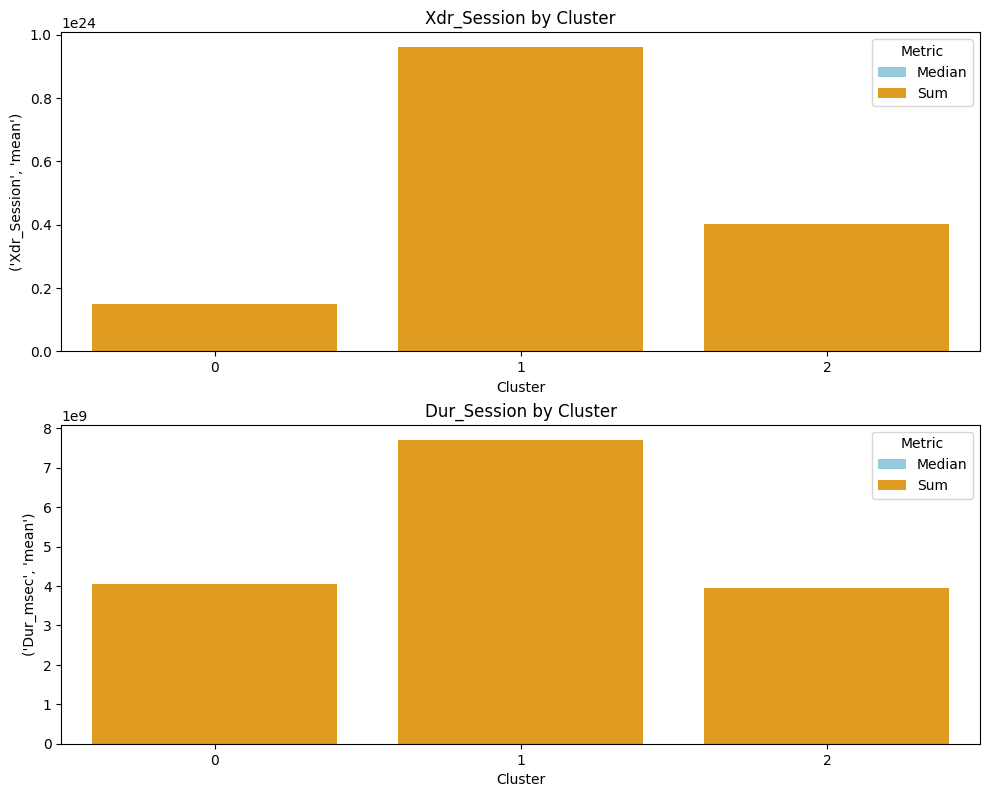

In [30]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot Xdr_Session
sns.barplot(x='Cluster', y=('Xdr_Session', 'mean'), data=metrics_summary, ax=axes[0], color='skyblue', label='Median')
sns.barplot(x='Cluster', y=('Xdr_Session', 'sum'), data=metrics_summary, ax=axes[0], color='orange', label='Sum')

# Plot Dur_msec
sns.barplot(x='Cluster', y=('Dur_msec', 'mean'), data=metrics_summary, ax=axes[1], color='skyblue', label='Median')
sns.barplot(x='Cluster', y=('Dur_msec', 'sum'), data=metrics_summary, ax=axes[1], color='orange', label='Sum')

# Adjust layout
plt.tight_layout()

# Show legend
axes[0].legend(title='Metric')
axes[1].legend(title='Metric')

# Set titles
axes[0].set_title('Xdr_Session by Cluster')
axes[1].set_title('Dur_Session by Cluster')

plt.show()


Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [31]:
# Define the list of applications to aggregate
applications = ['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)','Other UL (Bytes)']

# Calculate the total traffic per application for each user
total_traffic_per_user = data1.groupby('MSISDN/Number')[applications].sum()

# Derive the top 10 most engaged users per application with the help of loop's function in python 
top_10_per_application = {}
for app in applications:
    top_10_per_application[app] = total_traffic_per_user.nlargest(10, app)

for app, top_10_users in top_10_per_application.items():
    print(f"Top 10 users for {app}:")
    print(top_10_users)

Top 10 users for Social Media DL (Bytes):
               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.362632e+10                42743837.0                 630942.0   
3.376054e+10                39297646.0                 485543.0   
3.365973e+10                34900444.0                 511914.0   
3.361489e+10                27749744.0                 544800.0   
3.362578e+10                26564121.0                 571379.0   
3.366716e+10                23753753.0                 494097.0   
3.378632e+10                23568655.0                 406264.0   
3.366907e+10                23477047.0                 323787.0   
3.360313e+10                22776679.0                 301146.0   
3.365849e+10                22695673.0                 304393.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.36263

* Plot the top 3 most used applications using appropriate charts.  


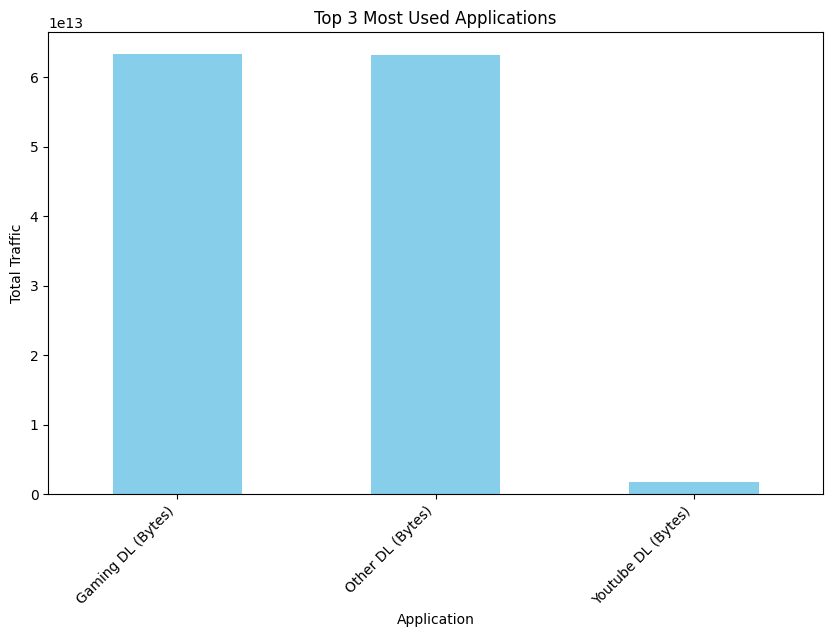

In [32]:
# Calculate the total traffic per application
total_traffic_per_application = data1[applications].sum()

# Get the top 3 most used applications
top_3_applications = total_traffic_per_application.nlargest(3)

# Plotting
plt.figure(figsize=(10, 6))
top_3_applications.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.xticks(rotation=45, ha='right')
plt.show()

Interpretation:

Top 3 Most Used Applications:
* Identify the applications with the highest total traffic.
* Consider these applications as the most popular or data-intensive among users.

Q. Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
* What is the optimized value of k (use the elbow method for this)?  
* Interpret your findings. 


WHAT IS ELBOW METHOD ?
* The elbow method is a heuristic used to determine the optimal number of clusters (k) in a k-means clustering algorithm. It involves plotting the sum of squared distances (inertia) of data points to their assigned cluster centers for different values of k and selecting the "elbow" point where further cluster addition provides diminishing returns in reducing inertia.

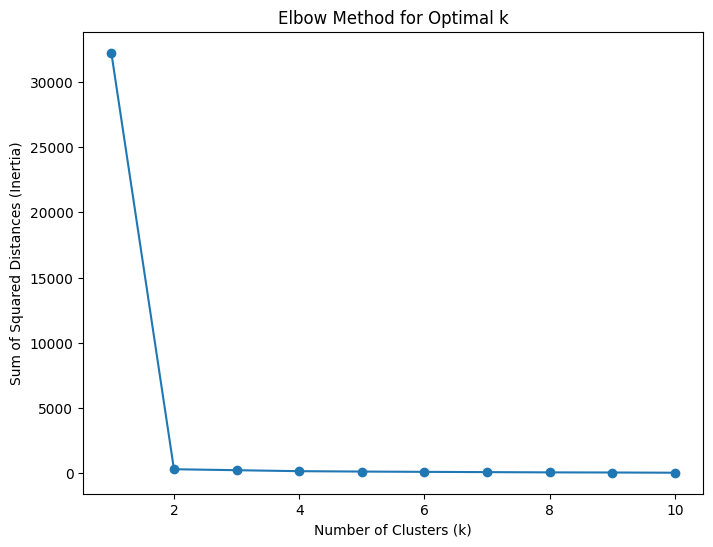

In [33]:
# Select the engagement metrics for clustering
engagement_metrics = ['Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Initialize a list to store inertias
inertias = []

# Define a range of k values
k_values = range(1, 11)

# Run k-means clustering for each k value and store inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_engagement_metrics)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

Interpretation:

Optimal k:

* Look for the point where the reduction in inertia significantly slows down, forming an elbow in the plot.
* In the plot, identify the value of k where adding more clusters doesn't result in a substantial reduction in the sum of squared distances.

# TASK - 3 ( Experience Analytics)

Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):
* Average TCP retransmission
* Average RTT
* Handset type
* Average throughput


* Calculate average TCP retransmission

In [34]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [35]:
avg_tcp_retransmission = df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)
avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)

In [36]:
# Average TCP retransmission 
# Calculate average TCP retransmission
df['Avg_TCP_Retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
df['Avg_TCP_Retransmission']
df['Avg_TCP_Retransmission'].fillna(df['Avg_TCP_Retransmission'].mean(), inplace=True)

* Calculate average RTT

In [37]:
# Average RTT
df['Avg_RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Avg_RTT']
df['Avg_RTT'].fillna(df['Avg_RTT'].mean(), inplace=True)

* Handset's Type
* Calculate the mode of 'Handset Type' for each unique 'MSISDN/Number'

In [50]:
handset_type = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0])   # CALCULATE USING MODE 
handset_type

MSISDN/Number
3.360100e+10      Huawei P20 Lite Huawei Nova 3E
3.360100e+10              Apple iPhone 7 (A1778)
3.360100e+10                           undefined
3.360101e+10             Apple iPhone 5S (A1457)
3.360101e+10             Apple iPhone Se (A1723)
                              ...               
3.379000e+10                 Huawei Honor 9 Lite
3.379000e+10         Apple iPhone 8 Plus (A1897)
3.197020e+12    Quectel Wireless. Quectel Ec25-E
3.370000e+14                    Huawei B525S-23A
8.823970e+14    Quectel Wireless. Quectel Ec21-E
Name: Handset Type, Length: 106856, dtype: object

* Calculate average throughput

In [38]:
# Calculate average throughput
df['Avg_Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Avg_Throughput']
df['Avg_Throughput'].fillna(df['Avg_Throughput'].mean(), inplace=True)

In [39]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (DL+UL),Duration Decile,Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,345629377.0,8.0,1.285848e+07,23.500000,33.500000
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,707185356.0,8.0,1.285848e+07,35.000000,21.000000
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,307690973.0,8.0,1.285848e+07,63.512443,7.500000
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,889352748.0,8.0,1.285848e+07,63.512443,44.000000
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,607681403.0,8.0,1.285848e+07,63.512443,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,631804110.0,3.0,1.285848e+07,16.000000,58.500000
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,705783925.0,5.0,1.285848e+07,14.500000,38.500000
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,627698629.0,5.0,1.285848e+07,24.500000,45.000000
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,401522016.0,5.0,1.285848e+07,21.000000,35.500000


In [40]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:
* TCP values in the dataset. 
* RTT values in the dataset.
* Throughput values in the dataset.


*  TCP values in the dataset. 

In [41]:
# Top 10 TCP values
top_10_tcp = df['Avg_TCP_Retransmission'].nlargest(10)
print("Top 10 TCP values:")
print(top_10_tcp)

# Bottom 10 TCP values
bottom_10_tcp = df['Avg_TCP_Retransmission'].nsmallest(10)
print("Bottom 10 TCP values:")
print(bottom_10_tcp)

# Most frequent TCP values
most_frequent_tcp = df['Avg_TCP_Retransmission'].value_counts().head(10)
print("Most frequent TCP values:")
print(most_frequent_tcp)

Top 10 TCP values:
34636     2.172058e+09
140797    2.150739e+09
77950     2.147216e+09
135677    2.145732e+09
3741      2.144060e+09
119667    2.137746e+09
39608     2.134324e+09
59011     2.130808e+09
76971     2.130087e+09
41182     2.127330e+09
Name: Avg_TCP_Retransmission, dtype: float64
Bottom 10 TCP values:
143594    43.0
111100    48.5
18417     53.0
13142     54.0
97061     56.5
8794      64.0
99947     64.5
83214     67.0
95955     67.0
12849     71.5
Name: Avg_TCP_Retransmission, dtype: float64
Most frequent TCP values:
Avg_TCP_Retransmission
1.285848e+07    99530
1.330000e+03       29
2.660000e+03       24
3.325000e+03       20
1.995000e+03       19
3.990000e+03       14
9.365000e+02       13
1.324000e+03        9
7.980000e+03        9
5.320000e+03        8
Name: count, dtype: int64


* RTT values in the dataset.

In [42]:
# Top 10 RTT values
top_10_rtt = df['Avg_RTT'].nlargest(10)
print("Top 10 RTT values:")
print(top_10_rtt)

# Bottom 10 RTT values
bottom_10_rtt = df['Avg_RTT'].nsmallest(10)
print("Bottom 10 RTT values:")
print(bottom_10_rtt)


# Most frequent RTT values
most_frequent_rtt = df['Avg_RTT'].value_counts().head(10)
print("Most frequent RTT values:")
print(most_frequent_rtt)


Top 10 RTT values:
30155     48462.0
29916     32320.5
17894     27906.0
5963      27424.0
22839     13639.0
23442     13150.0
1361      12961.0
81256     12857.5
97312     12694.0
100575    12369.0
Name: Avg_RTT, dtype: float64
Bottom 10 RTT values:
42602     0.0
103321    0.0
124538    0.0
143878    0.0
71738     1.0
50966     2.0
144923    2.0
103544    2.5
8756      3.0
123210    3.0
Name: Avg_RTT, dtype: float64
Most frequent RTT values:
Avg_RTT
63.512443    27840
14.500000     4993
19.500000     4222
19.000000     2761
20.000000     2647
15.000000     2592
14.000000     2424
24.500000     2219
20.500000     1978
15.500000     1960
Name: count, dtype: int64


* Throughput values in the dataset.

In [43]:
#Top 10 throughput values
top_10_throughput = df['Avg_Throughput'].nlargest(10)
print("Top 10 throughput values:")
print(top_10_throughput)

# Bottom 10 throughput values
bottom_10_throughput = df['Avg_Throughput'].nsmallest(10)
print("Bottom 10 throughput values:")
print(bottom_10_throughput)

# Most frequent throughput values
most_frequent_throughput = df['Avg_Throughput'].value_counts().head(10)
print("Most frequent throughput values:")
print(most_frequent_throughput)

Top 10 throughput values:
120876    191131.0
143670    156622.0
141250    152149.5
91298     150273.0
116794    141965.5
141449    140572.0
149616    138576.0
92177     138102.5
116550    137026.0
117776    134944.0
Name: Avg_Throughput, dtype: float64
Bottom 10 throughput values:
148     0.0
614     0.0
2460    0.0
3893    0.0
4129    0.0
4822    0.0
5796    0.0
5961    0.0
6135    0.0
7186    0.0
Name: Avg_Throughput, dtype: float64
Most frequent throughput values:
Avg_Throughput
31.5    3886
7.5     3741
48.5    1945
45.0    1885
49.0    1801
48.0    1671
49.5    1571
44.5    1557
45.5    1520
46.5    1491
Name: count, dtype: int64


Task 3.3 - Compute & report:
* The distribution of the average throughput per handset type and provide interpretation for your findings.



In [44]:
# Group by 'Handset Type' and calculate distribution statistics for average throughput
throughput_distribution = df.groupby('Handset Type')['Avg_Throughput'].describe()

print(throughput_distribution)


                                                     count          mean  \
Handset Type                                                               
A-Link Telecom I. Cubot A5                             1.0  11755.000000   
A-Link Telecom I. Cubot Note Plus                      1.0   3349.500000   
A-Link Telecom I. Cubot Note S                         1.0   4468.500000   
A-Link Telecom I. Cubot Nova                           1.0  28108.500000   
A-Link Telecom I. Cubot Power                          1.0  34734.000000   
...                                                    ...           ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...     2.0     29.000000   
Zyxel Communicat. Lte7460                              1.0  30978.000000   
Zyxel Communicat. Sbg3600                              1.0  48675.500000   
Zyxel Communicat. Zyxel Wah7706                        1.0   1086.500000   
undefined                                           8987.0   5030.306721   

           

In [45]:
# Find the top 10 throughput values per handset type
top_10_throughput_per_handset=df.groupby('Handset Type')['Avg_Throughput'].nlargest(10)

print(top_10_throughput_per_handset)


Handset Type                             
A-Link Telecom I. Cubot A5         22915     11755.0
A-Link Telecom I. Cubot Note Plus  24538      3349.5
A-Link Telecom I. Cubot Note S     83394      4468.5
A-Link Telecom I. Cubot Nova       98614     28108.5
A-Link Telecom I. Cubot Power      24450     34734.0
                                              ...   
undefined                          120512    98759.0
                                   141422    92963.5
                                   6126      91007.0
                                   115482    88844.5
                                   42130     88430.5
Name: Avg_Throughput, Length: 5736, dtype: float64


Interpretation:

Handset Type Impact:

* Observe whether there are significant differences in the average throughput distribution across different handset types.
* A wider spread or differences in median values could indicate variations in data speed or performance associated with specific handset types.

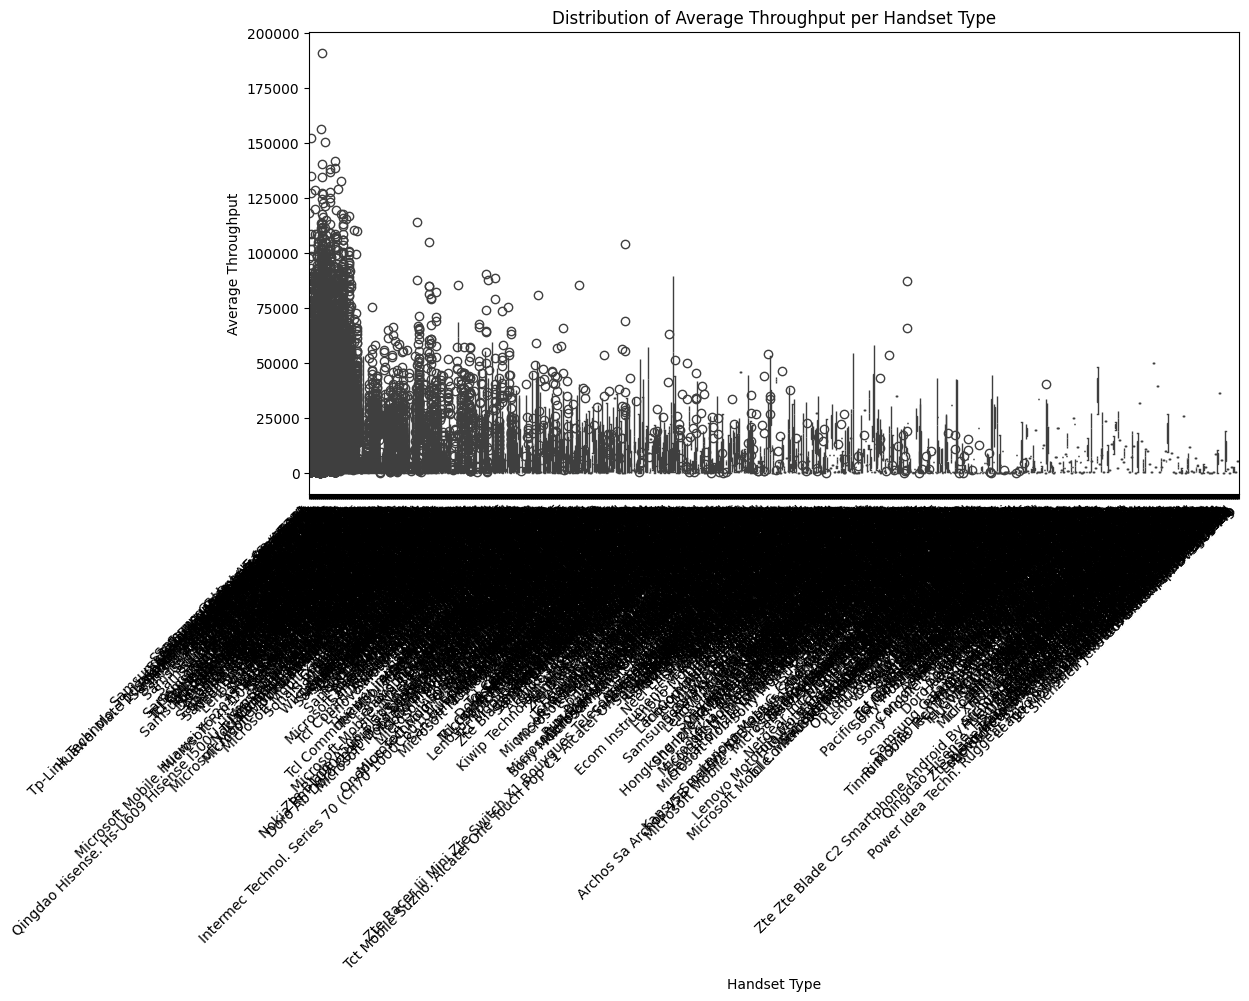

In [47]:
# Plotting the distribution of average throughput per handset type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Handset Type', y='Avg_Throughput', data=df)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.xticks(rotation=45, ha='right')
plt.show()

* The average TCP retransmission view per handset type and provide interpretation for your findings.


In [ ]:
throughput_distribution = df.groupby('Handset Type')['Avg_TCP_Retransmission'].describe()
print(throughput_distribution)

                                                     count          mean  \
Handset Type                                                               
A-Link Telecom I. Cubot A5                             0.0           NaN   
A-Link Telecom I. Cubot Note Plus                      1.0  3.081065e+05   
A-Link Telecom I. Cubot Note S                         1.0  2.070587e+07   
A-Link Telecom I. Cubot Nova                           1.0  6.858500e+04   
A-Link Telecom I. Cubot Power                          1.0  4.020500e+03   
...                                                    ...           ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...     0.0           NaN   
Zyxel Communicat. Lte7460                              1.0  2.063827e+07   
Zyxel Communicat. Sbg3600                              1.0  2.674347e+07   
Zyxel Communicat. Zyxel Wah7706                        0.0           NaN   
undefined                                           1948.0  2.020937e+06   

           

In [ ]:
# Find the top 10 throughput values per handset type
top_10_throughput_per_handset=df.groupby('Handset Type')['Avg_TCP_Retransmission'].nlargest(10)
top_10_throughput_per_handset

Handset Type                             
A-Link Telecom I. Cubot A5         22915            NaN
A-Link Telecom I. Cubot Note Plus  24538       308106.5
A-Link Telecom I. Cubot Note S     83394     20705865.5
A-Link Telecom I. Cubot Nova       98614        68585.0
A-Link Telecom I. Cubot Power      24450         4020.5
                                                ...    
undefined                          12302     77157031.0
                                   82411     74945798.5
                                   89502     61116316.5
                                   138009    59991575.5
                                   93168     57527704.0
Name: Avg_TCP_Retransmission, Length: 5736, dtype: float64

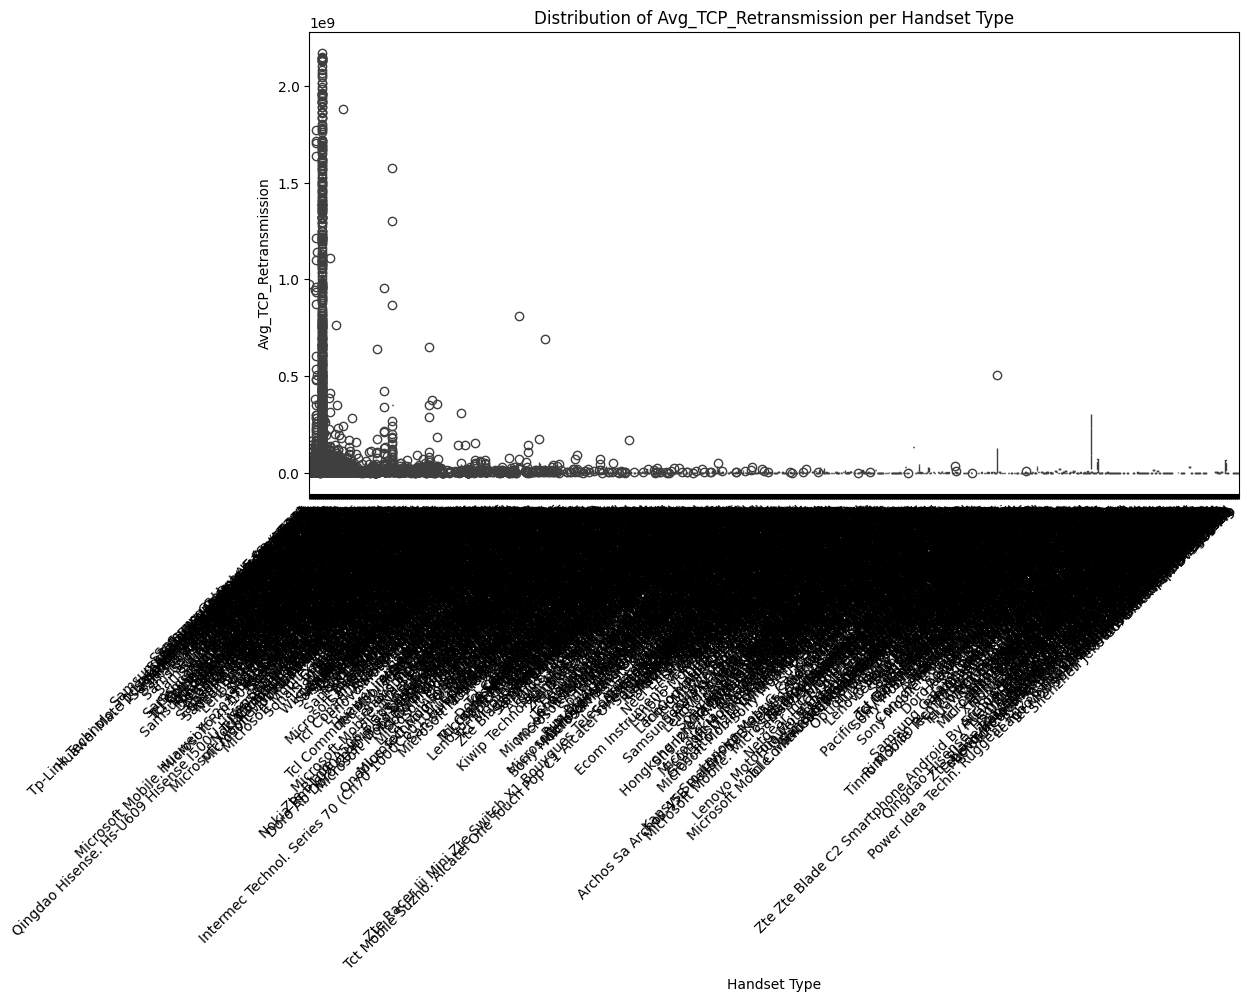

In [ ]:
# Plotting the distribution of average throughput per handset type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Handset Type', y='Avg_TCP_Retransmission', data=df)
plt.title('Distribution of Avg_TCP_Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Avg_TCP_Retransmission')
plt.xticks(rotation=45, ha='right')
plt.show()

TASK 3.4
* perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster

In [ ]:
# Select the relevant experience metrics for clustering
experience_metrics = df[['Average_Throughput', 'Avg_RTT', 'Avg_TCP_Retransmission']]

# Perform scaling or normalization 
scaler = MinMaxScaler()
experience_metrics = pd.DataFrame(scaler.fit_transform(df[['Avg_TCP_Retransmission', 'Avg_RTT', 'Average_Throughput']]), columns=['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput'], index=df.index)

# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(experience_metrics)

# Display the cluster distribution
cluster_distribution = df['Cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)

# Define the list of features for clustering
features_for_clustering = ['Average_Throughput', 'Avg_RTT', 'Avg_TCP_Retransmission']

# Initialize a list to store cluster descriptions
cluster_descriptions = []

# Iterate over each cluster label
for cluster_label in range(3):
    # Filter data for the current cluster
    cluster_data = df[df['Cluster'] == cluster_label]
    
    # Calculate mean values for each feature in the cluster
    mean_values = cluster_data[features_for_clustering].mean().to_dict()
    
    # Create a description for the cluster
    description = f"Cluster {cluster_label} - Mean values: {mean_values}"
    
    # Append the description to the list
    cluster_descriptions.append(description)

# Display the cluster descriptions
print("\nCluster Descriptions:")
for desc in cluster_descriptions:
    print(desc)



Cluster Distribution:
Cluster
0    111898
1     30003
2      8100
Name: count, dtype: int64

Cluster Descriptions:
Cluster 0 - Mean values: {'Average_Throughput': 1072.2477232594565, 'Avg_RTT': 65.94221771125063, 'Avg_TCP_Retransmission': 11472235.995562892}
Cluster 1 - Mean values: {'Average_Throughput': 20633.02281438523, 'Avg_RTT': 58.45514155195701, 'Avg_TCP_Retransmission': 8679495.191407196}
Cluster 2 - Mean values: {'Average_Throughput': 48303.47765432099, 'Avg_RTT': 48.67876696822176, 'Avg_TCP_Retransmission': 47488169.88311378}


Interpretation:

Cluster Distribution:

* Observe the number of users in each cluster.
Evaluate whether the cluster sizes are balanced or if there's a significant imbalance.
Cluster Descriptions:

* For each cluster, the mean values of 'TCP Retransmission', 'RTT', and 'Throughput' are provided.
Analyze the characteristics of each cluster based on these mean values to understand the experiences associated with each group.

# Task 4 - (Satisfaction Analysis)

TASK 4.1
* Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)


* Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster

In [52]:
#Assuming the first clustering results stored in a DataFrame called "cluster_centroids":
# Assuming the first clustering results stored in a DataFrame called "cluster_centroids":
less_engaged_cluster = cluster_centroids.loc[0].values

# Select the engagement metrics for calculating engagement score:
engagement_metrics = ['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']

# Fill null values in engagement metrics with the mean value:
imputer = SimpleImputer(strategy='mean')
df[engagement_metrics] = imputer.fit_transform(df[engagement_metrics])

# Calculate the engagement score for each user:
df['Engagement Score'] = df.apply(lambda row: distance.euclidean(row[engagement_metrics].values, less_engaged_cluster), axis=1)

# Sort the data by engagement score in ascending order:
sorted_data = df.sort_values(by='Engagement Score')

# Print the users and their corresponding engagement scores:
print(sorted_data[['MSISDN/Number', 'Engagement Score']])

         MSISDN/Number  Engagement Score
1398698   3.366679e+10      4.485551e+02
1398699   3.366679e+10      4.485551e+02
30135     3.366042e+10      1.500128e+03
30134     3.366042e+10      1.500128e+03
936590    3.376277e+10      7.348381e+03
...                ...               ...
745398    3.376211e+10      2.136114e+09
745397    3.376211e+10      2.136114e+09
1349389   3.369858e+10      2.139637e+09
506835    3.366045e+10      2.160956e+09
506836    3.366045e+10      2.160956e+09

[1413361 rows x 2 columns]


* Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster. 


In [51]:
# Centroid of each cluster:
cluster_centroids = df.groupby('Cluster')[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].mean()

# Determine the worst experience cluster:
worst_cluster = cluster_centroids.idxmax().values[0]

# Euclidean distance for each user data point:
df['Experience_score'] = df.apply(lambda row: distance.euclidean(row[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']], cluster_centroids.loc[worst_cluster]), axis=1)

# experience score for each user:

print(df[['MSISDN/Number', 'Experience_score']])

         MSISDN/Number  Experience_score
0         3.366496e+10     789213.989841
1         3.366496e+10     789213.989841
2         3.368185e+10     789214.146341
3         3.368185e+10     789214.146341
4         3.376063e+10     789214.315239
...                ...               ...
1413356            NaN     789155.320054
1413357            NaN     789155.320054
1413358            NaN     789155.320054
1413359            NaN     789155.320054
1413360            NaN     789155.320054

[1413361 rows x 2 columns]


In [50]:
# Merge 'df' with 'data1' based on the common column 'MSISDN' or 'MSISDN/Number'
df = pd.merge(df, data1[['MSISDN/Number', 'Cluster']], on='MSISDN/Number', how='left')

# Display the updated DataFrame
print(df)


            Bearer Id             Start  Start ms               End  End ms  \
0        1.311450e+19  04-04-2019 12:01     770.0  25-04-2019 14:35   662.0   
1        1.311450e+19  04-04-2019 12:01     770.0  25-04-2019 14:35   662.0   
2        1.311450e+19  09-04-2019 13:04     235.0  25-04-2019 08:15   606.0   
3        1.311450e+19  09-04-2019 13:04     235.0  25-04-2019 08:15   606.0   
4        1.311450e+19  09-04-2019 17:42       1.0  25-04-2019 11:58   652.0   
...               ...               ...       ...               ...     ...   
1413356           NaN               NaN       NaN               NaN     NaN   
1413357           NaN               NaN       NaN               NaN     NaN   
1413358           NaN               NaN       NaN               NaN     NaN   
1413359           NaN               NaN       NaN               NaN     NaN   
1413360           NaN               NaN       NaN               NaN     NaN   

         Dur. (ms)          IMSI  MSISDN/Number    

* Task 4.2 - 


* Consider the average of both engagement & experience scores as  the satisfaction 

In [53]:
# Calculate the satisfaction score:
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience_score']) / 2

sorted_df = df.sort_values(by='Satisfaction Score', ascending=False)

# Top 10 satisfied customers:
top_10_satisfied_customers = sorted_df.head(10)

# Report the top 10 satisfied customers:
print(top_10_satisfied_customers[['MSISDN/Number', 'Satisfaction Score']])

         MSISDN/Number  Satisfaction Score
506836    3.366045e+10        2.159683e+09
506835    3.366045e+10        2.159683e+09
1349389   3.369858e+10        2.138364e+09
745398    3.376211e+10        2.134841e+09
745397    3.376211e+10        2.134841e+09
1326330   3.365872e+10        2.133358e+09
1326331   3.365872e+10        2.133358e+09
1326332   3.365872e+10        2.133358e+09
15280     3.365871e+10        2.131686e+09
1229629   3.366469e+10        2.125371e+09


* TASK 4.3

* Build a regression model of your choice to predict the satisfaction score of a customer. 


In [55]:
# Convert to float if it's not already
from sklearn.ensemble import RandomForestRegressor

df['Satisfaction Score'] = df['Satisfaction Score'].astype(float)

X = df[['Engagement Score', 'Experience_score']]
y = df['Satisfaction Score']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = rf_regressor.score(X_test, y_test)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared:', r2)


Mean Squared Error (MSE): 2985099173.9335055
Root Mean Squared Error (RMSE): 54636.06111290881
R-squared: 0.9999994114567927


####  R2 value of 0.99 indicates that the model explains all the variability in the satisfaction score based on the predictor variables. This implies that the model fits the data perfectly, with no residual variability unaccounted for.

#### Task 4.4 


* Run a k-means (k=2) on the engagement & the experience score. 

In [56]:
X = df[['Engagement Score', 'Experience_score']]

# Run k-means clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the result
print(df[['Engagement Score', 'Experience_score', 'Cluster']])

         Engagement Score  Experience_score  Cluster
0            1.756939e+06     789213.989841        0
1            1.756939e+06     789213.989841        0
2            1.756939e+06     789214.146341        0
3            1.756939e+06     789214.146341        0
4            1.756939e+06     789214.315239        0
...                   ...               ...      ...
1413356      1.756923e+06     789155.320054        0
1413357      1.756923e+06     789155.320054        0
1413358      1.756923e+06     789155.320054        0
1413359      1.756923e+06     789155.320054        0
1413360      1.756923e+06     789155.320054        0

[1413361 rows x 3 columns]


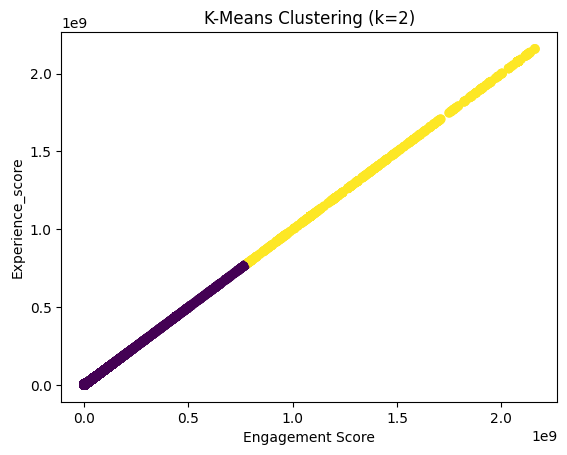

In [57]:
# Visualize the clusters
plt.scatter(X['Engagement Score'], X['Experience_score'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Engagement Score')
plt.ylabel('Experience_score')
plt.show()

### TASK 4.5 


- Aggregate the average satisfaction & experience score per cluster. 

In [58]:
cluster_aggregate = df.groupby('Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience_score': 'mean'
})
print(cluster_aggregate)

         Satisfaction Score  Experience_score
Cluster                                      
0              7.099459e+06      7.403330e+06
1              1.545022e+09      1.543749e+09
